<a href="https://colab.research.google.com/github/gaurav21s/deep-learning-basic/blob/main/CNN_image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fm = keras.datasets.fashion_mnist
(X_train_full,y_train_full),(X_test,y_test)= fm.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
class_names=['Tshirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

In [5]:
 X_train_full=X_train_full.reshape((60000,28,28,1))
 X_test=X_test.reshape((10000,28,28,1))

In [6]:
X_train_n=X_train_full/255
X_test_n=X_test/255

In [7]:
X_valid,X_train=X_train_n[:5000],X_train_n[5000:]
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test_n


In [8]:
np.random.seed(42)
tf.random.set_seed(42)


In [9]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=32,kernel_size=(3,3),strides=1,padding='valid',activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(500,activation="relu"))
model.add(keras.layers.Dense(350,activation="relu"))
model.add(keras.layers.Dense(150,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 500)               2704500   
_________________________________________________________________
dense_1 (Dense)              (None, 350)               175350    
_________________________________________________________________
dense_2 (Dense)              (None, 150)               52650     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1

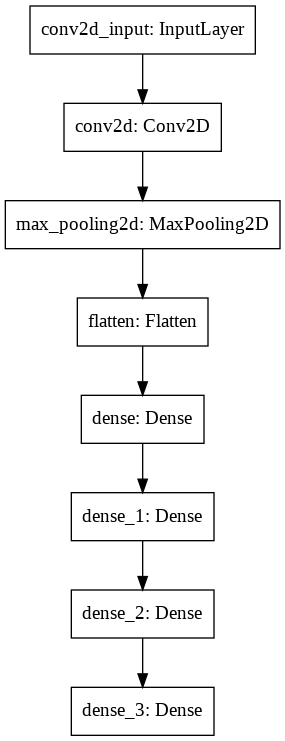

In [11]:
import pydot
keras.utils.plot_model(model)


In [12]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=['accuracy'])

In [26]:
history=model.fit(X_train,y_train,epochs=20,batch_size=64,
                  validation_data=(X_valid,y_valid))

Epoch 1/20
860/860 [==============================] - 6s 7ms/step - loss: 0.2385 - accuracy: 0.9125 - val_loss: 0.3071 - val_accuracy: 0.8874
Epoch 2/20
860/860 [==============================] - 6s 7ms/step - loss: 0.2330 - accuracy: 0.9142 - val_loss: 0.2809 - val_accuracy: 0.8978
Epoch 3/20
860/860 [==============================] - 6s 7ms/step - loss: 0.2280 - accuracy: 0.9157 - val_loss: 0.5070 - val_accuracy: 0.8212
Epoch 4/20
860/860 [==============================] - 6s 7ms/step - loss: 0.2226 - accuracy: 0.9189 - val_loss: 0.2984 - val_accuracy: 0.8894
Epoch 5/20
860/860 [==============================] - 6s 7ms/step - loss: 0.2192 - accuracy: 0.9195 - val_loss: 0.2634 - val_accuracy: 0.9056
Epoch 6/20
860/860 [==============================] - 6s 7ms/step - loss: 0.2117 - accuracy: 0.9227 - val_loss: 0.2604 - val_accuracy: 0.9032
Epoch 7/20
860/860 [==============================] - 6s 7ms/step - loss: 0.2075 - accuracy: 0.9236 - val_loss: 0.2866 - val_accuracy: 0.8986
Epoch 

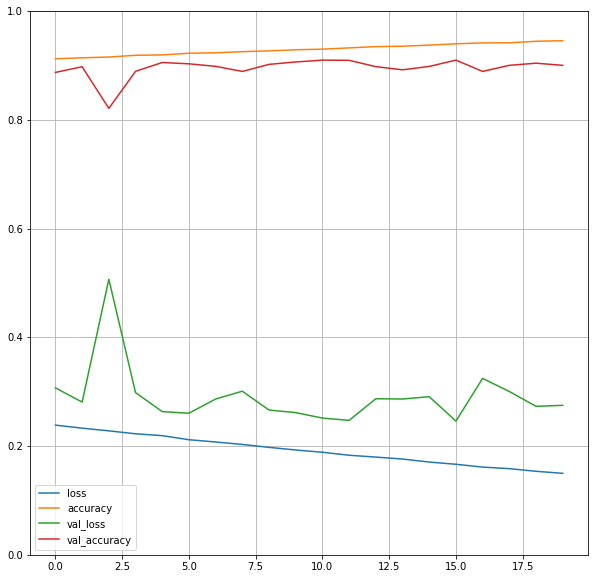

In [27]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [15]:
ev = model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4103 - accuracy: 0.8437


In [16]:
X_new=X_test[15:22]

In [17]:
yproba=model.predict(X_new)
yproba.round(2)

array([[0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.96, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.45, 0.  , 0.24, 0.  , 0.31, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.99, 0.  ],
       [0.93, 0.  , 0.  , 0.  , 0.  , 0.  , 0.07, 0.  , 0.  , 0.  ],
       [0.14, 0.  , 0.7 , 0.01, 0.  , 0.  , 0.15, 0.  , 0.01, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.69, 0.  , 0.27, 0.  , 0.03]],
      dtype=float32)

In [20]:
classes=np.argmax(yproba,axis=1)
np.array(class_names)[classes]

array(['Trouser', 'Pullover', 'Pullover', 'Bag', 'Tshirt', 'Pullover',
       'Sandal'], dtype='<U10')

AxesImage(54,36;334.8x217.44)


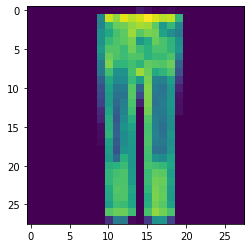

In [22]:
print(plt.imshow(X_test[15].reshape((28,28))))